# Predicting Home Values


# Goals
* Discover drivers that have a strong relationship to predict home values.
* Use drivers to develop a machine learning model to make accurate predictions. 
* We will be looking at sold properies from 2017. 
* This information could be used to better understand changing markets.

## Imports

In [1]:
# importing the necessary libraries to run the code
from env import get_db_url
import wrangle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt

from wrangle import X_y_split

from explore import combo_bed_bath_1M, bed_bath_count_over_1M, relplot_var, one_bath_two_bedrooms, x_and_df, y_and_df
from explore import sf_div_value


# from explore import monthly_v_churn, hyp_month_v_churn, t_test_monthly_churn, chi2_payment_churn

from modeling import median_mean_choice, test_run
# from modeling import model_random_forest, model_log, model_knn_test

import warnings
warnings.filterwarnings("ignore")

In [2]:
wrangle.df_shape()

The number of rows is 52442
The number of columns is 63


## Acquire

* Aquired the data from CodeUp database
* Data size 52,442 rows and 63 columns.
* Each obsevation represent the sale of a property
* Each column reperesents a feature or data point of that sale

## Prepare

* Removed columns that did not contain useful information
* Checked for nulls in the data 
* Checked that column data types were appropriate
* Split data into train, validate and test (approx. 60/20/20)
* Outliers have not been removed for this iteration of the project
* Found the Counties that the fips codes represented online https://www.weather.gov/hnx/cafips

In [3]:
# used my wrangle function that acquires, preps and cleans the data
df = wrangle.wrangle_zillow()

# splits data train, validate, test
train, validate, test = wrangle.split_clean_zillow()

# Data At a Glance

In [4]:
train.head()

,bathrooms,bedrooms,sqft,fips,home_value,zip_code
30707,3.0,4.0,1965.0,6037.0,194803.0,97330.0
20167,1.5,3.0,1363.0,6059.0,338024.0,97063.0
24162,2.0,3.0,1262.0,6037.0,55863.0,96361.0
30921,2.0,3.0,1921.0,6037.0,700112.0,96387.0
49586,4.0,6.0,3174.0,6037.0,885972.0,96517.0


In [5]:
train.describe()

,bathrooms,bedrooms,sqft,fips,home_value,zip_code
count,31164.000000,31164.000000,31164.000000,31164.000000,3.116400e+04,31164.000000
mean,2.287848,3.291266,1905.043897,6049.099410,5.169842e+05,96643.405468
std,0.981549,0.908149,942.390865,21.052046,6.602886e+05,4874.109337
min,0.000000,0.000000,128.000000,6037.000000,3.254000e+03,95982.000000
25%,2.000000,3.000000,1268.000000,6037.000000,1.939980e+05,96208.000000
50%,2.000000,3.000000,1656.000000,6037.000000,3.727900e+05,96412.000000
75%,3.000000,4.000000,2298.000000,6059.000000,6.127742e+05,96995.000000
max,7.500000,6.000000,12056.000000,6111.000000,2.538125e+07,399675.000000


# Exploration

## * What number of Bedrooms and Bathrooms do Homes averaging over 1 million have?

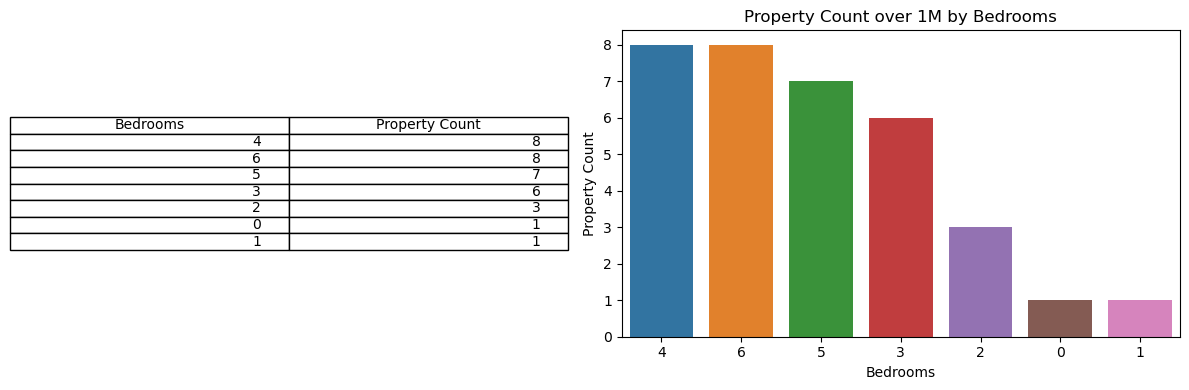

In [6]:
x_and_df()

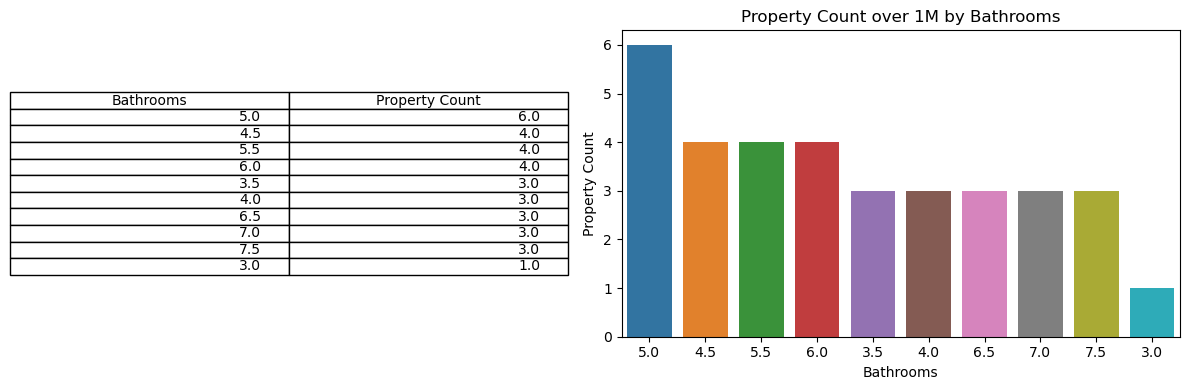

In [7]:
y_and_df()

### Takeaways:

* Homes with 4,5, and 6 bedrooms have the most million dollar homes
* Bathroom count is more inconsistent

# Evaluation Question:
    
## * Do properties with more bedroom significantly have more value?
### * I will preform a Chi^2 Test to test id Bedroom have any carrelationn to Home Value

I will use a confidence interval of 95%\
The resulting alpha is .05

In [8]:
test_results = stats.pearsonr(train.bedrooms, train.home_value)
test_results


PearsonRResult(statistic=0.2484726996011647, pvalue=0.0)

## * How does Square footage impact Home Value?


<Figure size 2000x900 with 0 Axes>

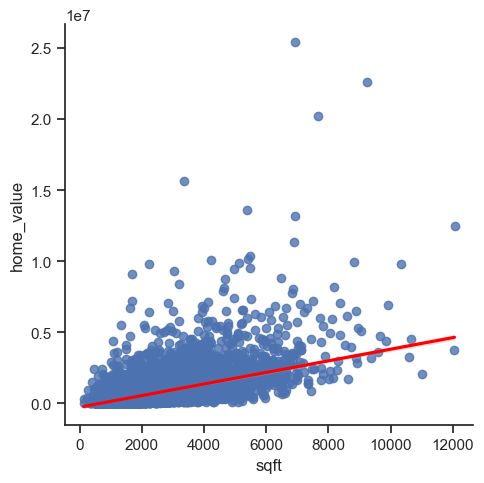

In [9]:
plt.figure(figsize=(20, 9))

# Create the scatter plot with a red line
sns.set(style="ticks")
sns.lmplot(data=train, x='sqft', y='home_value', line_kws={'color': 'red'})

# Show the plot
plt.show()

### Takeaways:
* Square fooage plays a key role on Home Value


---

# Evaluation Question:
    
## * Are properties with more square footages significantly have more value?
### * I will preform a Pearson-R to show square footage has no carrelationn to Value

I will use a confidence interval of 95%\
The resulting alpha is .05

## Hypothesis:
H-o = There is no linear correlation betweeen Square Footage and Home Value.\
H-a = There is a linear correlation betweeen Square Footage and Home Value

In [10]:
test_results = stats.pearsonr(train.sqft, train.home_value)
test_results


PearsonRResult(statistic=0.5814200017157635, pvalue=0.0)

### The p-value is near zero. Therefore, we have evidence to support that the square footage has a relation with home value. Based on this,  I believe that using "home_value" will provide a moderate improvement in the model's accuracy.


---

## * Is having 1 bathroom worse for property value than having 2 bedrooms?

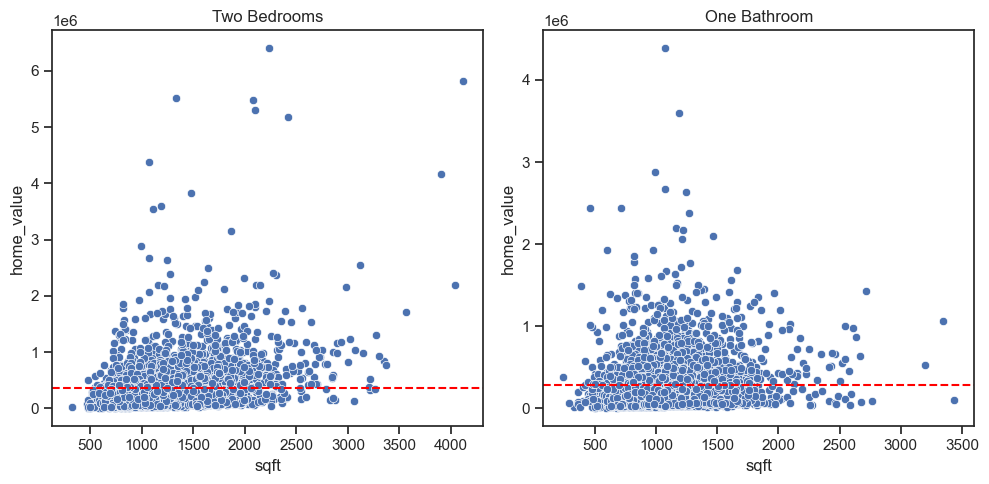

In [11]:
mean1, mean2 = one_bath_two_bedrooms()

### Takeaways:
* There were a total of 4964 one Bedroom properties
* There were a total of 362 two Bedroom properties
* The average One Bath is \\$280,803 and \$263 per sf
* The average Two Bedroom is \\$341,589 and \$296 per sf

In [12]:
test_results = stats.pearsonr(train.bedrooms, train.home_value)
test_results


PearsonRResult(statistic=0.2484726996011647, pvalue=0.0)

### The p-value is near zero. Therefore, we have evidence to support that bedroom count has a relation with home value. Based on this,  I believe that using "Bedrooms" will provide a moderate improvement in the model's accuracy.

## * What are properties Home Value averages in their counties ?

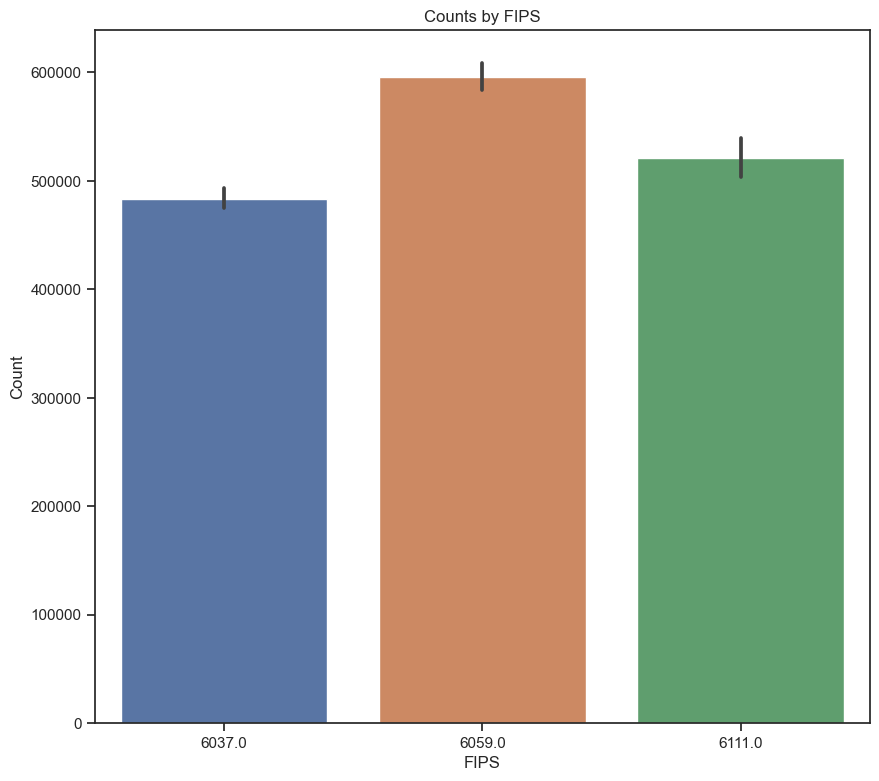

In [13]:
plt.figure(figsize=(10, 9))
sns.barplot(x='fips', y=train.home_value, data=train)
plt.title("Counts by FIPS")
plt.xlabel("FIPS")
plt.ylabel("Count")
plt.show()


In [14]:
train.groupby('fips').home_value.mean()

fips
6037.0    483792.583428
6059.0    596263.575150
6111.0    521020.144330
Name: home_value, dtype: float64

---

## Modeling

* Customers who do not churn makeup 73% of the data
* By assuming non-churner a 73% baseline accuracy is achieved
* I will compare how each of the four model runs
* I will compare the train with validate data
* The best preforming model will be used on my test data

### Prep Data

In [15]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split()

# -----

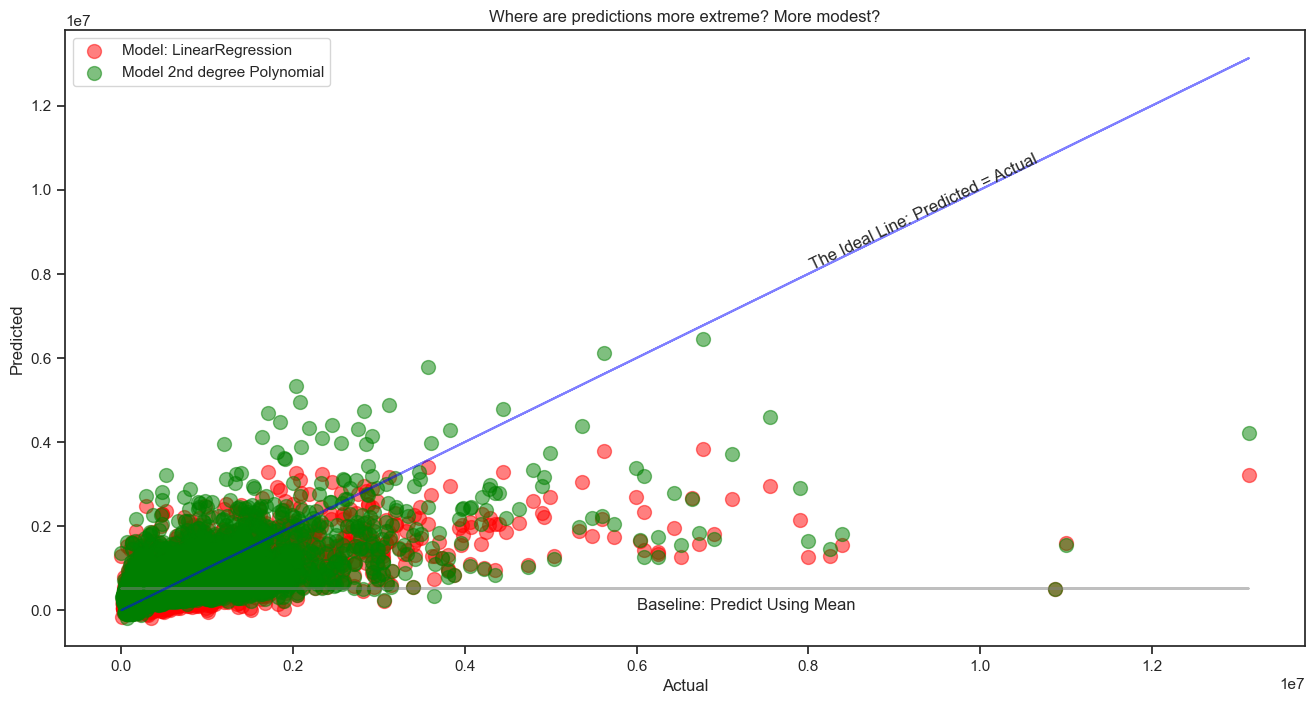

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,660277.958640,620152.690204,0.000000
1,OLS Regressor,527054.922177,485740.912307,0.386530
2,LassoLars,527054.922177,485740.906138,0.386530
3,Tweedie,660277.958640,620152.690204,0.000000
4,Polynomial,498676.216652,469275.315458,0.427444


In [16]:
median_mean_choice()

## OLS Regressor model

### * This model had the best RMSE score and because of this it represents a closer fit to the model.

## LassoLars Model

### * This model had an identical RMSE score as OLS alpha was set to 1.0 but further inspection is required

## Tweedie Model

### * This model had an identical RMSE score as baseline


## Polynomial Model

### * This model had an the second best RMSE score but opted for the OLS model

# Comparing Summary
* Decision OLS and Lasso Lars models all performed similar to each other
* Lasso Lars needs more modifications as alpha was set to 1.0 and score returned same as OLS
* The Polyomial model had the second best RMSE score 
* Tweedie model preformed poorly. I may need to revisit and see where mistakes may have been made.

* The OLS Model was selected to run the test data.

# LassoLars Model Testing

In [17]:
test_run()

RMSE for LassoLars alpha=0.01
    _____________________________________________      
    Out-of-Sample Performance: 472368.7037218387
    Baseline: 516984.1616288025



## Modeling Summary

* OLS Model and LassoLars models performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* Knn Model preformed slighlty better than baseline

# Conclusion

## Exploration Summary
* Square Footage plays big role towards value.
* Number of Bedrooms plays a big role towards.
* Although bahtrooms does have a relation with value it is tied to Bedrooms.
* Million dollar homes still follow a standard. More doesn't mean more.



## Modeling
* The final model failed to significantly outperform the baseline. Possible reasons include:

“Bathroom” and “fips” may not have had meaningful relation to Home Value.
 

## Recommendations
* Use the model and if necessary remove the outliers. Also add a feature that replaces the fips code with actual county name.

## Next Steps
* Run RFE or KBest for best feaures to use in the model and create new ones with. And ivestigate why Tweedie ran so poor.
